# BEE 4750 Homework 2: Dissolved Oxygen

**Name**: Christine Swanson

**ID**: cms549

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [15]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\chris\Box\classwork\2023_Fall\BEE5750\hw\hw02-christinemswanson`

In [16]:
using Plots
using LaTeXStrings
using Distributions
using Statistics

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.35 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [81]:
# DO model (this only works for single discharge point, not 2)

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    a1 = exp(-ka * x / U)
    a2 = (kc / (ka - kc)) * (exp(-kc * x / U) - a1)
    a3 = (kn / (ka - kn)) * (exp(-kn * x / U) - a1)
    C = (Cs * (1 - a1)) + (C0 * a1) - (B0 * a2) - (N0 * a3)

    B0 = B0 * a1 # return B0
    N0 = N0 * a1 # return N0

    print("B0 is", B0, "N0 is", N0)
    return C
end

dissolved_oxygen (generic function with 1 method)

In [82]:
x = 0:0.1:15
C_1 = (y -> dissolved_oxygen(y, 10, 7.27, 9.09, 7.73, 0.55, 0.35, 0.25, 6)).(x)

B0 is9.09N0 is7.73B0 is9.007055741983569N0 is7.6594654439530245B0 is8.924868332145124N0 is7.589574500273026B0 is8.843430864410896N0 is7.5203212961382B0 is8.76273649572353N0 is7.451700012314949B0 is8.682778445467061N0 is7.383704882668909B0 is8.603549994897168N0 is7.316330193680431B0 is8.525044486576594N0 is7.249570283964475B0 is8.44725532381574N0 is7.183419543794904B0 is8.370175970118353N0 is7.1178724146331B0 is8.293799948632277N0 is7.052923388660892B0 is8.218120841605213N0 is6.9885670083177445B0 is8.143132289845441N0 is6.924797865842163B0 is8.06882799218748N0 is6.861610602817296B0 is7.995201704962595N0 is6.798999909720667B0 is7.922247241474165N0 is6.736960525478031B0 is7.849958471477818N0 is6.675487237021291B0 is7.778329320666319N0 is6.614574878850456B0 is7.7073537701591555N0 is6.55421833259959B0 is7.637025855996779N0 is6.494412526606722B0 is7.567339668639468N0 is6.435152435487689B0 is7.498289352470755N0 is6.376433079713855B0 is7.429869105305387N0 is6.31824952519369B0 is7.3620731779017

N0 is6.035199206868456B0 is7.032260759409988N0 is5.980129336659979B0 is6.968092921030744N0 is5.925561966949137B0 is6.904510600114963N0 is5.871492512529007B0 is6.841508453944102N0 is5.817916430031674B0 is6.779081188550754N0 is5.7648292175464615B0 is6.717223558273803N0 is5.7122264142416395B0 is6.655930365317641N0 is5.66010359998959B0 is6.595196459315407N0 is5.6084563949953905B0 is6.535016736896209N0 is5.55728045942879B0 is6.475386141256295N0 is5.506571493059534B0 is6.416299661734141N0 is5.45632523489603B0 is6.357752333389407N0 is5.406537462827297B0 is6.299739236585753N0 is5.357203993268193B0 is6.242255496577436N0 is5.308320680807875B0 is6.185296283099701N0 is5.259883417861462B0 is6.128856809962903N0 is5.211888134324889B0 is6.072932334650327N0 is5.164330797232896B0 is6.017518157919681N0 is5.117207410420147B0 is5.962609623408234N0 is5.070514014185441B0 is5.908202117241542N0 is5.024246684958979B0 is5.854291067645756N0 is4.978401534972684B0 is5.800871944563456N0 is4.9329747119334995B0 is5.74

151-element Vector{Float64}:
 7.27
 7.210287468684139
 7.151558941408789
 7.093803105773068
 7.037008765254879
 6.981164838083742
 6.92626035612431
 6.872284463770458
 6.81922641684984
 6.767075581538838
 ⋮
 4.82507303239822
 4.831600254132351
 4.838275237864572
 4.84509555153357
 4.8520587910659625
 4.859162580089342
 4.866404569648054
 4.873782437921795
 4.881293889946921

In [37]:
maximum(C_1)

7.27

In [83]:
# from waste point 2 to end
#x_2 = 15:0.1:50
x_2 = 0:0.1:50 # need to reset the distance at the next box
C_2 = (y -> dissolved_oxygen(y, 10, 4.89, 7.42, 5.916, 0.55, 0.35, 0.25, 6)).(x_2)

B0 is7.42N0 is5.916B0 is7.352294126019591N0 is5.862017796432871B0 is7.28520605330218N0 is5.808528168643625B0 is7.218730144546629N0 is5.755526621986234B0 is7.152860813890934N0 is5.7030087028273275B0 is7.08759252644286N0 is5.650969998171963B0 is7.02291979781485N0 is5.599406135292811B0 is6.958837193663182N0 is5.548312781362721B0 is6.89533932923133N0 is5.497685643090641B0 is6.83242086889749N0 is5.447520466360856B0 is6.770076525726237N0 is5.3978130358755285B0 is6.708301061024277N0 is5.348559174800489B0 is6.64708928390024N0 is5.299754744414261B0 is6.586436050828504N0 is5.251395643760301B0 is6.526336265216992N0 is5.203477809302389B0 is6.466784876978911N0 is5.155997214583186B0 is6.407776882108406N0 is5.108949869885894B0 is6.349307322260075N0 is5.062331821899003B0 is6.291371284332335N0 is5.016139153384111B0 is6.233963900054577N0 is4.970367982846749B0 is6.177080345578092N0 is4.925014464210242B0 is6.120715841070737N0 is4.880074786492518B0 is6.064865650315288N0 is4.835545173485882B0 is6.0095250803

4.778750244436909N0 is3.8101194671278646B0 is4.73514519567226N0 is3.7753529619403086B0 is4.691938033421973N0 is3.7409036934938538B0 is4.649125127058799N0 is3.7067687670727567B0 is4.606702879084162N0 is3.6729453143749202B0 is4.564667724825879N0 is3.6394304932708765B0 is4.523016132138615N0 is3.606221487564966B0 is4.481744601107087N0 is3.5733155067586964B0 is4.440849663751975N0 is3.5407097858162646B0 is4.400327883738505N0 is3.5084015849322103B0 is4.3601758560877135N0 is3.4763881893012014B0 is4.320390206890315N0 is3.4446669088899067B0 is4.2809675930232105N0 is3.4132350782109593B0 is4.2419047018685685N0 is3.382090056098983B0 is4.203198251035466N0 is3.351229225488655B0 is4.164844988084081N0 is3.320649993194801B0 is4.1268416902523875N0 is3.290349789694491B0 is4.089185164185363N0 is3.260326068911133B0 is4.051872245666644N0 is3.230576308000521B0 is4.0148997993526505N0 is3.201098007138852B0 is3.978264718509128N0 is3.1718886893126688B0 is3.941963924750087N0 is3.1429459001107163B0 is3.905994367779

2.808112053647853N0 is2.238920607733248B0 is2.782488646528291N0 is2.2184909478249826B0 is2.757099047383578N0 is2.198247704086422B0 is2.731941122767182N0 is2.1781891755108695B0 is2.7070127586998005N0 is2.158313676612941B0 is2.6823118604917293N0 is2.138619537286937B0 is2.6578363525668496N0 is2.1191051026665075B0 is2.633584178288219N0 is2.099768732985593B0 is2.6095532997852557N0 is2.0806088034406436B0 is2.585741697782504N0 is2.0616237040540826B0 is2.56214737142995N0 is2.0428118395390276B0 is2.5387683381348993N0 is2.024171629165238B0 is2.5156026333953823N0 is2.0057015066262918B0 is2.4926483106350785N0 is1.9873999199079684B0 is2.4699034410397505N0 is1.9692653311578387B0 is2.447366113395166N0 is1.951296216556038B0 is2.4250344339265055N0 is1.9334910661872249B0 is2.40290652613923N0 is1.9158483839137044B0 is2.380980530661402N0 is1.898366687249711B0 is2.359254605087444N0 is1.8810445072368356B0 is2.3377269238233267N0 is1.8638803883205932B0 is2.316395677933166N0 is1.8468728882281147B0 is2.29525907

1.743414808939421N0 is1.3900326158605951B0 is1.7275065308599555N0 is1.3773488728527625B0 is1.711743412331824N0 is1.36478086622036B0 is1.6961241288059294N0 is1.3523275398943233B0 is1.680647367819398N0 is1.339987847441989B0 is1.6653118288852893N0 is1.3277607519791605B0 is1.650116223383323N0 is1.3156452260829838B0 is1.6350592744515948N0 is1.3036402517056112B0 is1.6201397168792877N0 is1.2917448200886614B0 is1.6053562970003543N0 is1.2799579316784497B0 is1.590707772588176N0 is1.2682785960420013B0 is1.5761929127511802N0 is1.2567058317838251B0 is1.561810497829408N0 is1.2452386664634474B0 is1.5475593192920336N0 is1.2338761365137025B0 is1.5334381796358079N0 is1.222617287159763B0 is1.5194458922844376N0 is1.2114611723389128B0 is1.505581281488877N0 is1.2004068546210507B0 is1.4918431822285332N0 is1.1894534051299195B0 is1.4782304401133717N0 is1.1785999034650547B0 is1.4647419112869131N0 is1.1678454376244447B0 is1.4513764623301189N0 is1.1571891039278954B0 is1.4381329701661492N0 is1.1466300069410968B0 i

0.6597984015486467N0 is0.5260602888897297B0 is0.6537778857228073N0 is0.5212601040345186B0 is0.6478123057845417N0 is0.5165037198141981B0 is0.6419011604559158N0 is0.5117907365575739B0 is0.6360439530330442N0 is0.5071207582403625B0 is0.6302401913443575N0 is0.5024933924519163B0 is0.6244893877092429N0 is0.4979082503622481B0 is0.618791058897067N0 is0.49336494668935965B0 is0.6131447260865698N0 is0.48886309966686614B0 is0.6075499148256304N0 is0.4844023310119177B0 is0.6020061549913998N0 is0.4799822658934126B0 is0.5965129807507961N0 is0.4756025329005B0 is0.5910699305213633N0 is0.4712627640113727B0 is0.5856765469324833N0 is0.4669625945623411B0 is0.5803323767869455N0 is0.46270166321719264B0 is0.5750369710228633N0 is0.45847961193682746B0 is0.5697898846759428N0 is0.4542960859491749B0 is0.5645906768420909N0 is0.45015073371938136B0 is0.5594389106403678N0 is0.4460432069202717B0 is0.5543341531762771N0 is0.44197316040308027B0 is0.549275975505389N0 is0.4379402521684476B0 is0.544263952597298N0 is0.433944143

B0 is0.3602990338234738N0 is0.28726807063337884B0 is0.35701138409580324N0 is0.28464681244080486B0 is0.3537537334514419N0 is0.28204947265481545B0 is0.3505258081553283N0 is0.2794758330251917B0 is0.34732733697017387N0 is0.2769256772932006B0 is0.3441580511336708N0 is0.27439879117342275B0 is0.34101768433590784N0 is0.2718949623357454B0 is0.33790597269699435N0 is0.26941398038752273B0 is0.33482265474488543N0 is0.2669556368558952B0 is0.3317674713934105N0 is0.2645197251702718B0 is0.3287401659205045N0 is0.26210604064497367B0 is0.3257404839466349N0 is0.259714380462034B0 is0.3227681734134263N0 is0.257344543654155B0 is0.3198229845624808N0 is0.25499633108782166B0 is0.3169046699143909N0 is0.25266954544656833B0 is0.3140129842479453N0 is0.25036399121439956B0 is0.31114768457952163N0 is0.24807947465935984B0 is0.30830853014267007N0 is0.24581580381725557B0 is0.30549528236788265N0 is0.24357278847552477B0 is0.3027077048625444N0 is0.2413502401572524B0 is0.29994556339107237N0 is0.2391479721053348B0 is0.29720862

0.10010795534747408B0 is0.12441229412932128N0 is0.09919449219259632B0 is0.12327705920911454N0 is0.09828936418883041B0 is0.12215218305877941N0 is0.0973924952797492B0 is0.12103757115681041N0 is0.09650381010292323B0 is0.11993312984419068N0 is0.09562323398358924B0 is0.11883876631652134N0 is0.09475069292837471B0 is0.11775438861622303N0 is0.09388611361908025B0 is0.1166799056248093N0 is0.09302942340651912B0 is0.11561522705522982N0 is0.09218055030441236B0 is0.11456026344428406N0 is0.09133942298334023B0 is0.11351492614510324N0 is0.09050597076474809B0 is0.11247912731970212N0 is0.0896801236150078B0 is0.11145277993159794N0 is0.0888618121395328B0 is0.11043579773849611N0 is0.0880509675769465B0 is0.10942809528504485N0 is0.0872475217933053B0 is0.10842958789565323N0 is0.08645140727637259B0 is0.10744019166737687N0 is0.0856625571299463B0 is0.10645982346286714N0 is0.08488090506823748B0 is0.10548840090338558N0 is0.08410638541030042B0 is0.10452584236188155N0 is0.08333893307451365B0 is0.10357206695613354N0 i

501-element Vector{Float64}:
 4.89
 4.869181448930111
 4.848904546480252
 4.829162473551167
 4.809948483479734
 4.791255901321517
 4.77307812314018
 4.755408615303703
 4.738240913787322
 4.72156862348315
 ⋮
 8.769936646224021
 8.77557268856086
 8.781184577598207
 8.786772396828393
 8.792336229687805
 8.797876159553638
 8.803392269740735
 8.808884643498478
 8.814353364007694

In [39]:
C_1

151-element Vector{Float64}:
 7.27
 7.210287468684139
 7.151558941408789
 7.093803105773068
 7.037008765254879
 6.981164838083742
 6.92626035612431
 6.872284463770458
 6.81922641684984
 6.767075581538838
 ⋮
 4.82507303239822
 4.831600254132351
 4.838275237864572
 4.84509555153357
 4.8520587910659625
 4.859162580089342
 4.866404569648054
 4.873782437921795
 4.881293889946921

In [57]:
maximum(C_2)

8.814353364007694

So it looks like the maximum discharge value is 8.33 mg/L, and this occurs at 50 km downstream? This can't be right...

### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

In [84]:
# append the 2 vectors together
C_combined = [C_1; C_2];
@show C_combined

C_combined = [7.27, 7.210287468684139, 7.151558941408789, 7.093803105773068, 7.037008765254879, 6.981164838083742, 6.92626035612431, 6.872284463770458, 6.81922641684984, 6.767075581538838, 6.715821433287784, 6.665453555756373, 6.615961639759165, 6.56733548222109, 6.519564985142839, 6.472640154576095, 6.426551099608457, 6.381288031358, 6.336841261977388, 6.293201203667413, 6.250358367699921, 6.208303363449994, 6.1670268974373155, 6.1265197723766605, 6.086772886237382, 6.047777231311835, 6.00952389329265, 5.972004050358778, 5.935208972270204, 5.899130019471286, 5.863758642202593, 5.829086379621204, 5.7951048589293634, 5.7618057945114245, 5.729180987078984, 5.697222322824182, 5.665921772581033, 5.635271390994735, 5.605263315698903, 5.575889766500603, 5.5471430445731835, 5.519015531656767, 5.491499689266343, 5.464588057907445, 5.438273256299257, 5.412547980605141, 5.3874050036705, 5.362837174267898, 5.33883741634938, 5.315398728305897, 5.292514182233852, 5.270176923208564, 5.24838016856471

652-element Vector{Float64}:
 7.27
 7.210287468684139
 7.151558941408789
 7.093803105773068
 7.037008765254879
 6.981164838083742
 6.92626035612431
 6.872284463770458
 6.81922641684984
 6.767075581538838
 ⋮
 8.769936646224021
 8.77557268856086
 8.781184577598207
 8.786772396828393
 8.792336229687805
 8.797876159553638
 8.803392269740735
 8.808884643498478
 8.814353364007694

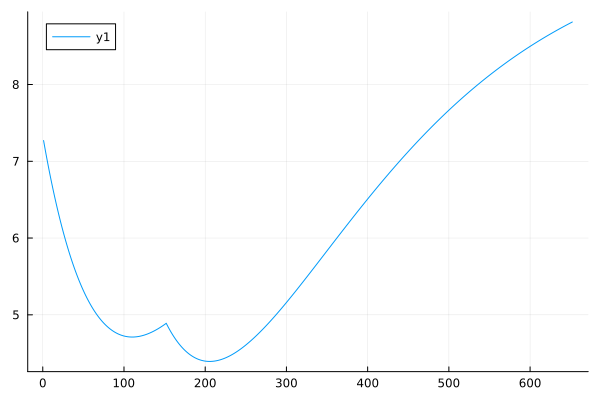

In [85]:
# plot [DO] versus distance downstream
# need to label this plot once I have it correct 
# need to fix x-axis
plot(C_combined)

In [56]:
minimum(C_combined)

4.710268902132073

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

# find for all C greater than = 6

### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.